In [1]:
!pip install scikit-learn

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

In [6]:
habitacoesusa = pd.read_csv("USA_Housing.csv")

In [7]:
habitacoesusa.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [8]:
habitacoesusa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [9]:
habitacoesusa.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [10]:
habitacoesusa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

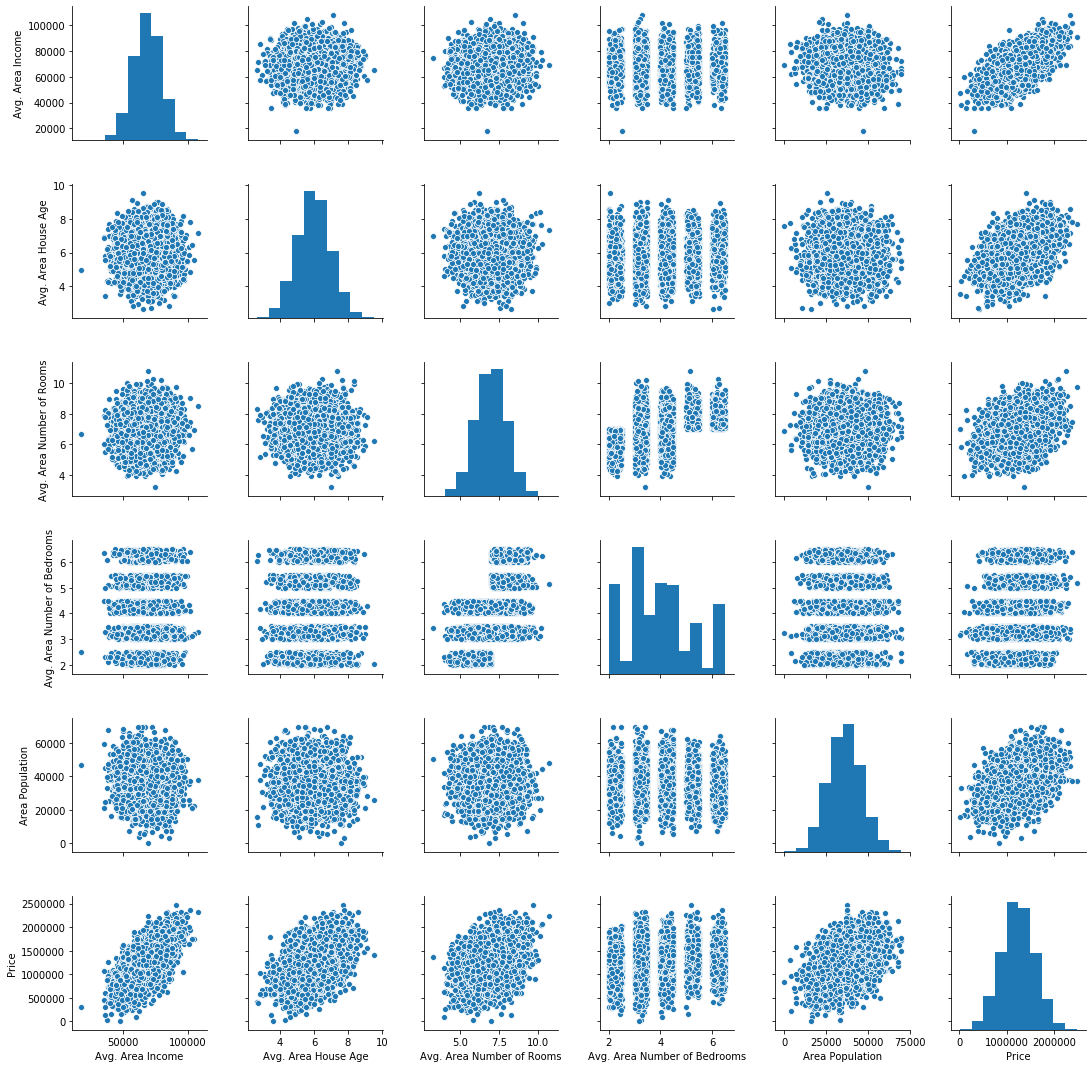

In [11]:
sns.pairplot(habitacoesusa)

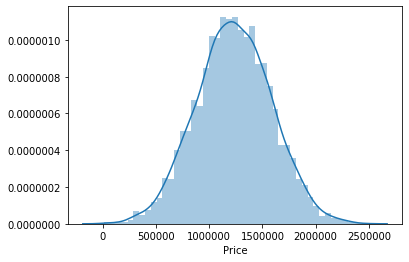

In [12]:
sns.distplot(habitacoesusa['Price'])

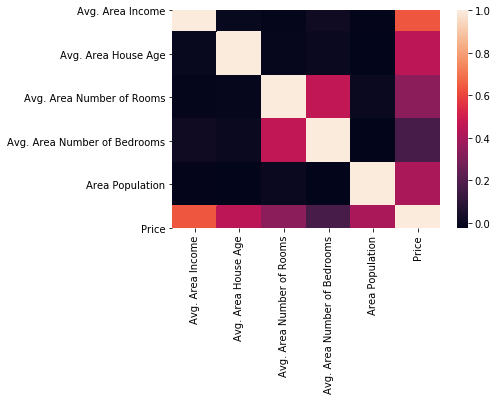

In [13]:
sns.heatmap(habitacoesusa.corr())

In [14]:
X = habitacoesusa[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
dtypes: float64(5)
memory usage: 195.4 KB


In [16]:
y = habitacoesusa[['Price']]

In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
Price    5000 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


In [18]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.4, random_state=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
regressao_linear = LinearRegression()

In [21]:
regressao_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predicao = regressao_linear.predict(X_test)

In [23]:
X.shape, X_train.shape, X_test.shape

((5000, 5), (3000, 5), (2000, 5))

In [24]:
print(regressao_linear.coef_, regressao_linear.intercept_)

[[2.15721784e+01 1.65410685e+05 1.21194704e+05 2.69859483e+03
  1.52803812e+01]] [-2646115.79080114]


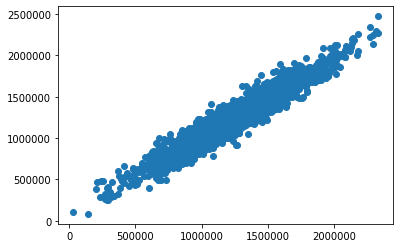

In [25]:
plt.scatter(y_test, predicao)

In [26]:
#coeff_df = pd.DataFrame(regressao_linear.coef_,X.columns,columns=['Coefficient'])
#coeff_df
coeff_df = pd.DataFrame(regressao_linear.coef_.T,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.572178
Avg. Area House Age           165410.684933
Avg. Area Number of Rooms     121194.704444
Avg. Area Number of Bedrooms    2698.594828
Area Population                   15.280381

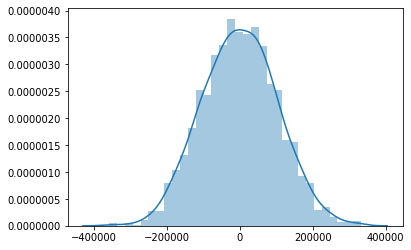

In [27]:
sns.distplot((predicao-y_test))

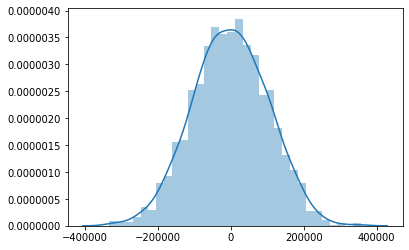

In [28]:
sns.distplot((y_test-predicao))

In [29]:
import sklearn.metrics as metrics
print('Mean absolute error MAE - erro absoluto médio ', metrics.mean_absolute_error(predicao, y_test))
print('Mean absolute error MAE - erro absoluto médio', metrics.mean_absolute_error(y_test, predicao))

print('\n\nMean squared error MSE - erro médio quadrático', metrics.mean_squared_error(y_test, predicao))
print('Mean squared error MSE - erro médio quadrático', metrics.mean_squared_error(y_test, predicao))


print('\n\nRoot Mean squared error RMSE - erro médio quadrático', math.sqrt(metrics.mean_squared_error(y_test, predicao)))
print('Root Mean squared error RMSE - erro médio quadrático', math.sqrt(metrics.mean_squared_error(y_test, predicao)))


Mean absolute error MAE - erro absoluto médio  82846.55865610311
Mean absolute error MAE - erro absoluto médio 82846.55865610311


Mean squared error MSE - erro médio quadrático 10627724452.954788
Mean squared error MSE - erro médio quadrático 10627724452.954788


Root Mean squared error RMSE - erro médio quadrático 103090.85533137646
Root Mean squared error RMSE - erro médio quadrático 103090.85533137646


In [30]:
erros = []
for i in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=1)
    regressao_linear.fit(X_train,y_train)
    predicao = regressao_linear.predict(X_test)

    mae=metrics.mean_absolute_error(predicao, y_test)
    mse=metrics.mean_squared_error(predicao, y_test)
    rmse=math.sqrt(metrics.mean_squared_error(predicao, y_test))
    #print(i, 'MAE', mae, 'MSE', mse, 'RMSE', rmse)
    erros.append([i, mae, mse, rmse])

errosdf = pd.DataFrame(erros, columns=['i', 'mae', 'mse', 'rmse'])

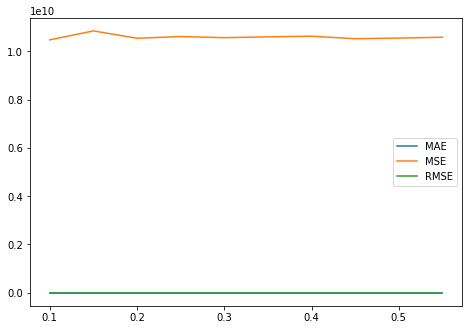

In [31]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(errosdf['i'], errosdf['mae'], label="MAE")
ax.plot(errosdf['i'], errosdf['mse'], label="MSE")
ax.plot(errosdf['i'], errosdf['rmse'], label="RMSE")

ax.legend()

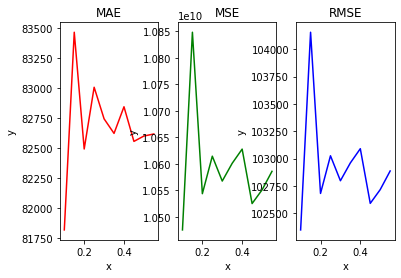

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].plot(errosdf['i'], errosdf['mae'], 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('MAE');

axes[1].plot(errosdf['i'], errosdf['mse'], 'g')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('MSE');

axes[2].plot(errosdf['i'], errosdf['rmse'], 'b')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('RMSE');

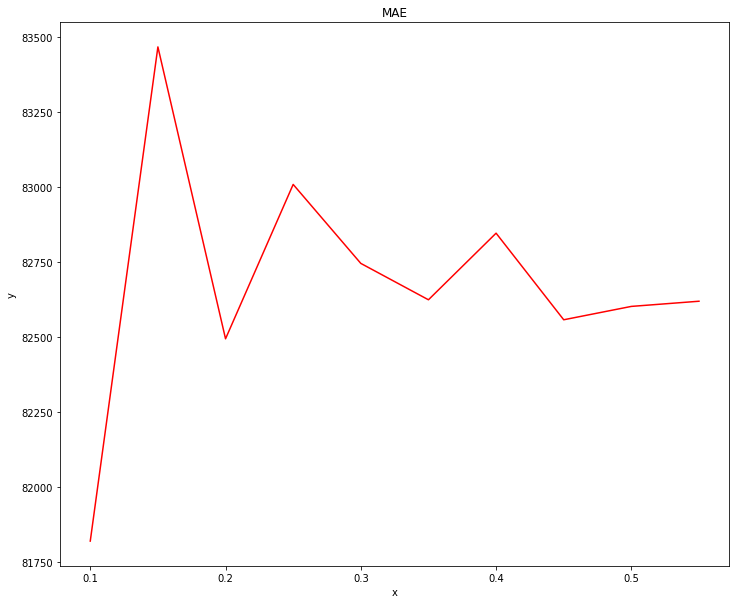

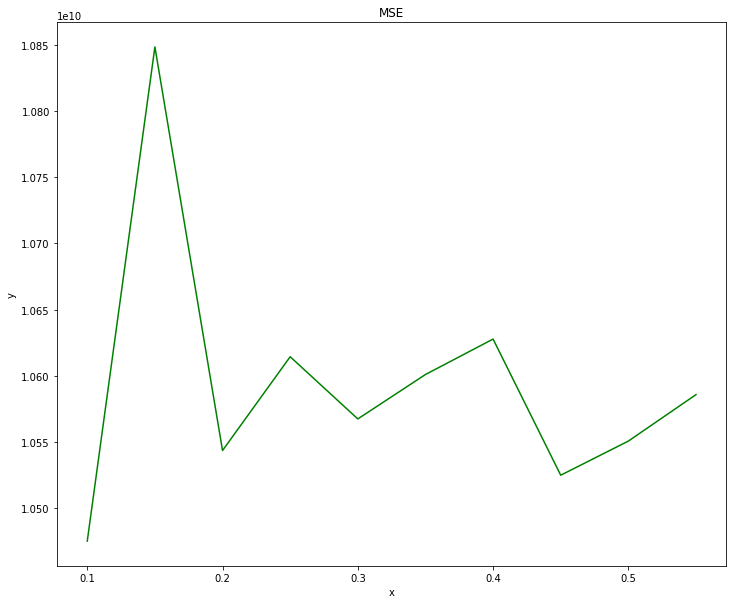

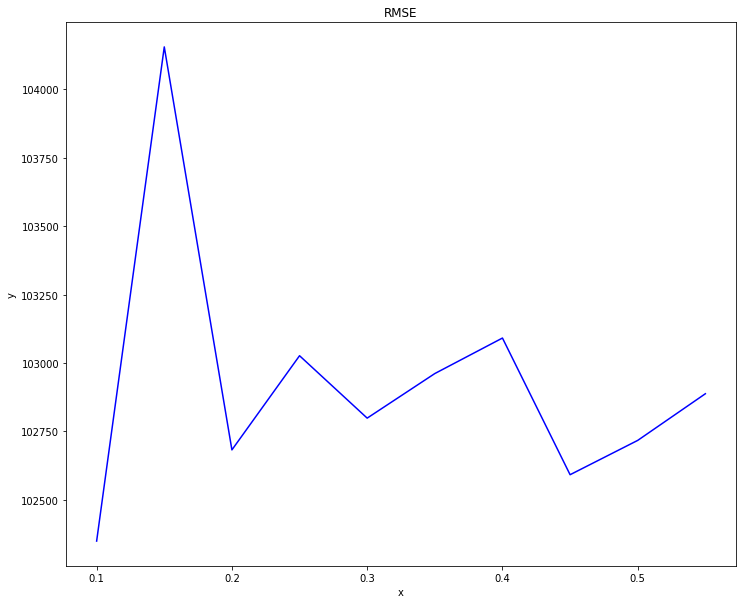

In [33]:
fig, axes = plt.subplots(figsize=(12,10))

axes.plot(errosdf['i'], errosdf['mae'], 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('MAE');

fig, axes = plt.subplots(figsize=(12,10))
axes.plot(errosdf['i'], errosdf['mse'], 'g')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('MSE');

fig, axes = plt.subplots(figsize=(12,10))
axes.plot(errosdf['i'], errosdf['rmse'], 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('RMSE');